# Modul 4 : Transformasi Wavelet

## 1. Lakukan Rekonstruksi Wavelet terhadap citra pada folder assets

### Mengimport Library - Library yang diperlukan

In [329]:
import cv2 as cv
# Mengimportkan library OpenCV yang digunakan untuk pengolahan citra dan video
import numpy as np 
# Mengimportkan library Numpy sebagai alat bantu matematika yang sering digunakan dalam pengolahan citra
import matplotlib.pyplot as plt 
# Mengimportkan library matplotlib.pyplot yang digunakan untuk membuaut plot grafik dan visualisasi data

### Membaca dan Menkonversi Citra

In [330]:
# mengimpor gambar "LL.jpg" dan menyimpannya ke variabel "approksimasi"
approksimasi = plt.imread("LL.jpg")
# mengubah warna gambar "approksimasi" menjadi skala abu-abu menggunakan OpenCV
approksimasi = cv.cvtColor(approksimasi, cv.COLOR_BGR2GRAY)
# mengimpor gambar "LH.jpg" dan menyimpannya ke variabel "detail_horizontal"
detail_horizontal = plt.imread("LH.jpg")
# mengubah warna gambar "detail_horizontal" menjadi skala abu-abu menggunakan OpenCV
detail_horizontal = cv.cvtColor(detail_horizontal, cv.COLOR_BGR2GRAY)
# mengimpor gambar "HL.jpg" dan menyimpannya ke variabel "detail_vertikal"
detail_vertikal = plt.imread("HL.jpg")
# mengubah warna gambar "detail_vertikal" menjadi skala abu-abu menggunakan OpenCV
detail_vertikal = cv.cvtColor(detail_vertikal, cv.COLOR_BGR2GRAY)
# mengimpor gambar "HH.jpg" dan menyimpannya ke variabel "detail_diagonal"
detail_diagonal = plt.imread("HH.jpg")
# mengubah warna gambar "detail_diagonal" menjadi skala abu-abu menggunakan OpenCV
detail_diagonal = cv.cvtColor(detail_diagonal, cv.COLOR_BGR2GRAY)

### Menentukan filter atau kernel yang akan digunakan

In [331]:
# mendefinisikan filter low-pass dengan nilai 0.7 dan 0.7
lowPass = np.array([0.7, 0.7])
# mendefinisikan filter high-pass dengan nilai -0.7 dan 0.7
highPass = np.array([-0.7, 0.7])

### Membuat fungsi untuk melakukan konvolusi bari dan kolom

In [332]:
# mendefinisikan fungsi konvolusiBaris dengan dua parameter: citra dan kernel
def konvolusiBaris(citra, kernel):
    # menambahkan padding pada kolom terakhir citra
    padd = np.pad(citra, ((0,0),(0,1)), 'constant', constant_values=0)
    # membuat variabel hasil dengan nilai 0 dan tipe data integer
    result = np.zeros(citra.shape).astype(int)
    # melakukan operasi konvolusi pada setiap baris citra dan kernel
    for i in range(citra.shape[0]):
        for j in range(citra.shape[1]):
            for x in range(len(kernel)):
                    result[i,j] += padd[i, j+x] * kernel[x]
    # mengembalikan hasil operasi konvolusi
    return result
# mendefinisikan fungsi konvolusiKolom dengan dua parameter: citra dan kernel
def konvolusiKolom(citra, kernel):
    # menambahkan padding pada baris terakhir citra
    padd = np.pad(citra, ((0,1),(0,0)), 'constant', constant_values=0)
    # membuat variabel hasil dengan nilai 0 dan tipe data integer
    result = np.zeros(citra.shape).astype(int)
    # melakukan operasi konvolusi pada setiap kolom citra dan kernel
    for i in range(citra.shape[0]):
        sum=0
        for j in range(citra.shape[1]):
            for x in range(len(kernel)):
                    result[i,j] += padd[i+x, j] * kernel[x]
    # mengembalikan hasil operasi konvolusi
    return result

### Membuat fungsi untuk melakukan Up Sampling baris dan kolom

In [333]:
# mendefinisikan fungsi upSamplingBaris dengan satu parameter: citra
def upSamplingBaris(citra):
    # membuat variabel hasil dengan ukuran dua kali lipat dari citra dan nilai 0
    result = np.zeros((citra.shape[0]*2,citra.shape[1])).astype(int)
    # melakukan operasi upsampling pada setiap baris citra
    x=0
    for i in range(citra.shape[0]):
        for j in range(citra.shape[1]):
            result[x,j] = citra[i][j]
            result[x+1,j] = citra[i][j]
        x+=2
    # mengembalikan hasil operasi upsampling
    return result
# mendefinisikan fungsi upSamplingKolom dengan satu parameter: citra
def upSamplingKolom(citra):
    # membuat variabel hasil dengan ukuran dua kali lipat dari citra dan nilai 0
    result = np.zeros((citra.shape[0],citra.shape[1]*2)).astype(int)
    # melakukan operasi upsampling pada setiap kolom citra
    for i in range(citra.shape[0]):
        x=0
        for j in range(citra.shape[1]):
            result[i,x] = citra[i][j]
            result[i,x+1] = citra[i][j]
            x+=2
    # mengembalikan hasil operasi upsampling
    return result

### Membuat Fungsi untuk melakukan rekonstruksi citra

In [334]:
def rekonstruksi(approksimasi, detail_horizontal,detail_vertical,detail_diagonal):
    # melakukan upsampling baris pada citra aproksimasi
    upSampl_row_app=upSamplingBaris(approksimasi) 
    # melakukan upsampling baris pada detail citra horizontal
    upSampl_row_hor=upSamplingBaris(detail_horizontal) 
    # melakukan upsampling baris pada detail citra vertikal
    upSampl_row_ver=upSamplingBaris(detail_vertical) 
    # melakukan upsampling baris pada detail citra diagonal
    upSampl_row_dia=upSamplingBaris(detail_diagonal) 

    # melakukan konvolusi pada hasil upsampling baris citra aproksimasi
    konv_col_low = konvolusiKolom(upSampl_row_app,lowPass) 
    # melakukan konvolusi pada hasil upsampling baris detail citra horizontal
    konv_col_high = konvolusiKolom(upSampl_row_hor,highPass) 
    # melakukan operasi penjumlahan dan upsampling kolom pada hasil konvolusi baris citra aproksimasi dan detail citra horizontal
    upSampl_low_high=upSamplingKolom(konv_col_high+konv_col_low) 
    # melakukan konvolusi pada hasil operasi penjumlahan dan upsampling kolom
    konv_row_low = konvolusiBaris(upSampl_low_high,lowPass) 

    # melakukan konvolusi pada hasil upsampling baris detail citra vertikal
    konv_col_low = konvolusiKolom(upSampl_row_ver,lowPass) 
    # melakukan konvolusi pada hasil upsampling baris detail citra diagonal
    konv_col_high = konvolusiKolom(upSampl_row_dia,highPass) 
    # melakukan operasi penjumlahan dan upsampling kolom pada hasil konvolusi baris detail citra vertikal dan diagonal
    upSampl_low_high=upSamplingKolom(konv_col_high+konv_col_low) 
    # melakukan konvolusi pada hasil operasi penjumlahan dan upsampling kolom
    konv_row_high = konvolusiBaris(upSampl_low_high,highPass) 

    # menjumlahkan hasil konvolusi baris untuk mendapatkan hasil rekonstruksi citra asli
    result = konv_row_high+konv_row_low 
    # mengembalikan hasil rekonstruksi citra asli
    return result 

Text(0.5, 1.0, 'Rekonstruksi Wavelet')

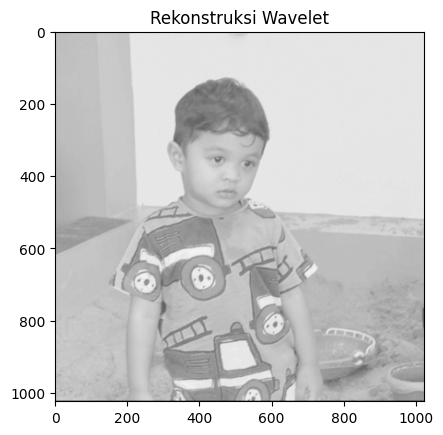

In [335]:
rekonstruksi_result = rekonstruksi(approksimasi, detail_horizontal, detail_vertikal, detail_diagonal)
plt.imshow(rekonstruksi_result,cmap="gray")
plt.title("Rekonstruksi Wavelet")

## 2. Lakukan Dekomposisi Wavelet Level 1 Pada Citra Hasil Rekonstruksi Menggunakan kernel X

### Membuat fungsi untuk melakukan Down Sampling Baris dan Kolom

In [336]:
def downSamplingBaris(citra):
    # membuat array kosong dengan ukuran setengah dari citra pada sumbu baris
    result = np.zeros((citra.shape[0]//2,citra.shape[1])).astype(int) 
    x=0
    # melakukan iterasi pada setengah dari jumlah baris citra
    for i in range(citra.shape[0]//2): 
        # melakukan iterasi pada setiap kolom citra
        for j in range(citra.shape[1]): 
            # menyimpan setiap piksel pada setiap baris ganjil ke array hasil
            result[i,j] = citra[x][j] 
        # menambah indeks x sebesar 2 untuk mengambil setiap piksel pada baris genap (dalam citra yang disubsampling)
        x+=2 
    return result

def downSamplingKolom(citra):
    # membuat array kosong dengan ukuran setengah dari citra pada sumbu kolom
    result = np.zeros((citra.shape[0],citra.shape[1]//2)).astype(int) '
    # melakukan iterasi pada setiap baris citra
    for i in range(citra.shape[0]): 
        x=0
        # melakukan iterasi pada setengah dari jumlah kolom citra
        for j in range(citra.shape[1]//2): 
            # menyimpan setiap piksel pada setiap kolom ganjil ke array hasil
            result[i,j] = citra[i][x] 
            # menambah indeks x sebesar 2 untuk mengambil setiap piksel pada kolom genap (dalam citra yang disubsampling)
            x+=2 
    return result

SyntaxError: unterminated string literal (detected at line 17) (1250521958.py, line 17)

### Membuat Fungsi untuk melakukan dekomposisi citra

In [ ]:
def dekomposisi(citra, level):
    # Dekomposisi citra dengan menggunakan filter lowPass dan highPass
    konvBarisLow = konvolusiBaris(citra, lowPass)
    konvBarisHigh = konvolusiBaris(citra, highPass)

    # Menyusutkan ukuran citra dengan downsampling
    downSampl_col_low = downSamplingKolom(konvBarisLow)
    # Konvolusi baris downsampling dengan filter lowPass
    konvKolomLow = konvolusiKolom(downSampl_col_low, lowPass)
    # Menyusutkan ukuran citra dengan downsampling
    approksimasi = downSamplingBaris(konvKolomLow)
    # Konvolusi baris downsampling dengan filter highPass
    konvKolomHigh = konvolusiKolom(downSampl_col_low, highPass)
    # Menyusutkan ukuran citra dengan downsampling
    detail_horizontal = downSamplingBaris(konvKolomHigh)

    # Menyusutkan ukuran citra dengan downsampling
    downSampl_col_high = downSamplingKolom(konvBarisHigh)
    # Konvolusi baris downsampling dengan filter lowPass
    konvKolomLow = konvolusiKolom(downSampl_col_high, lowPass)
    # Menyusutkan ukuran citra dengan downsampling
    detail_vertikal = downSamplingBaris(konvKolomLow)
    # Konvolusi baris downsampling dengan filter highPass
    konvKolomHigh = konvolusiKolom(downSampl_col_high, highPass)
    # Menyusutkan ukuran citra dengan downsampling
    detail_diagonal = downSamplingBaris(konvKolomHigh)

    # Menggabungkan hasil dekomposisi menjadi satu citra
    result = np.vstack((np.hstack((approksimasi, detail_horizontal)), np.hstack((detail_vertikal, detail_diagonal))))

    # Jika level lebih besar dari 1, maka rekursif panggil fungsi ini dengan level dikurangi 1
    if level > 1:
        approksimasi, detail_horizontal, detail_vertikal, detail_diagonal, result = dekomposisi(result, level - 1)
        return approksimasi, detail_horizontal, detail_vertikal, detail_diagonal, result
    # Jika level tidak lebih besar dari 1, maka kembalikan hasil dekomposisi
    else:
        return approksimasi, detail_horizontal, detail_vertikal, detail_diagonal, result

Text(0.5, 1.0, 'detail_diagonal / HH')

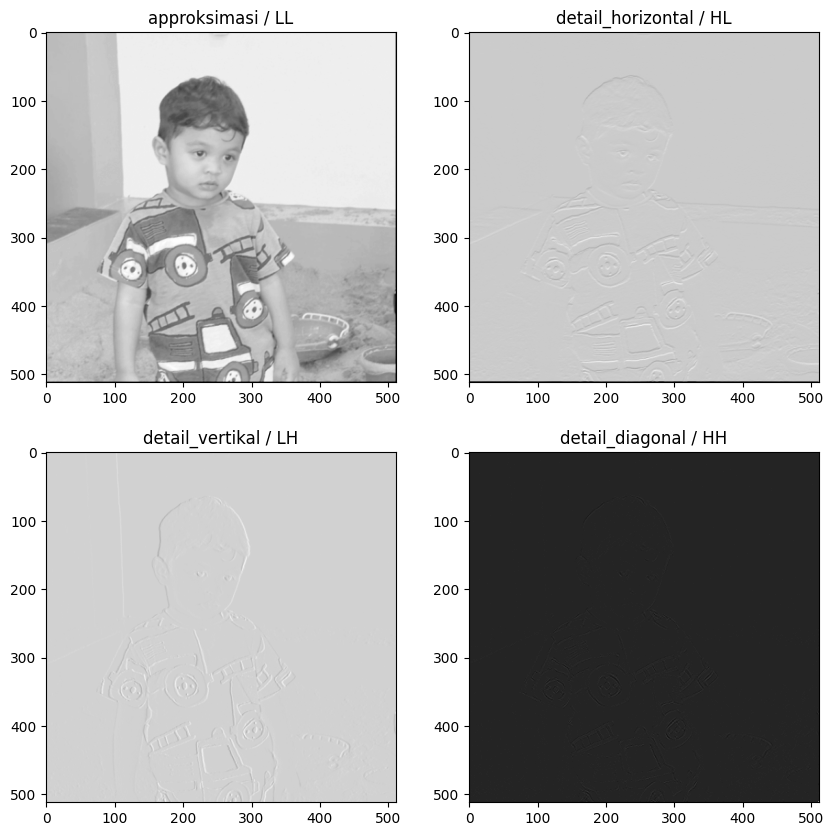

In [ ]:
approksimasi,detail_horizontal,detail_vertikal,detail_diagonal,lvl1 = dekomposisi(rekonstruksi_result,1)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
ax[0][0].imshow(approksimasi, cmap="gray")
ax[0][0].set_title('approksimasi / LL')
ax[0][1].imshow(detail_horizontal, cmap="gray")
ax[0][1].set_title('detail_horizontal / HL')
ax[1][0].imshow(detail_vertikal, cmap="gray")
ax[1][0].set_title('detail_vertikal / LH')
ax[1][1].imshow(detail_diagonal, cmap="gray")
ax[1][1].set_title('detail_diagonal / HH')

## 3. Lakukan Dekomposisi Wavelet Level 2 pada Hasil Dekomposisi level 1 menggunakan kernel x dan tampikan citra

Text(0.5, 1.0, 'Dekomposisi Wavelet Level 2')

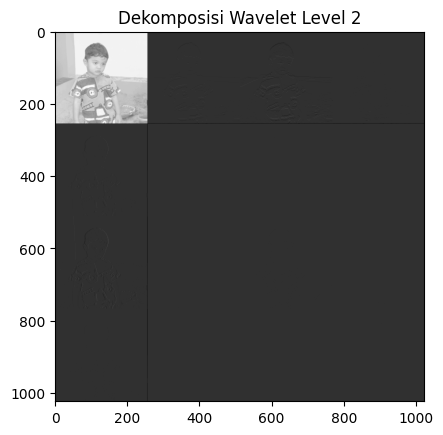

In [ ]:
# Dekomposisi citra dengan menggunakan wavelet hingga level 2
_, _, _, _, resultLVL2 = dekomposisi(rekonstruksi_result, 2)

# Menampilkan hasil dekomposisi dengan level 2 dalam bentuk citra grayscale
plt.imshow(resultLVL2, cmap="gray")

# Memberikan judul pada plot
plt.title("Dekomposisi Wavelet Level 2")
